# Analysis of the gills
- Oleksiy and Flu scanned them
- Dea delineated them
- David does the analysis

In [1]:
import platform
import os
import glob
import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
seaborn.set_style('dark')
import numpy
import scipy.misc
from matplotlib_scalebar.scalebar import ScaleBar
import skimage.filters
import skimage.morphology
import numpy.ma

In [2]:
# My figure defaults
plt.rc('image', cmap='gray', interpolation='nearest')  # Display all images in b&w and with 'nearest' interpolation
plt.rcParams['figure.figsize'] = (32, 18)  # Size up figures a bit
plt.rcParams["savefig.transparent"] = False

In [3]:
# Setup scale bar
plt.rcParams['scalebar.location'] = 'lower right'
plt.rcParams['scalebar.frameon'] = False
plt.rcParams['scalebar.color'] = 'white'

In [4]:
# Make directory for output
if 'debian' in platform.dist():
    StartDir = '/media/habi/Blue Seagate/'
else:
    StartDir = 'SomeDriveP:/'
RootDir = os.path.join(StartDir, 'Zebra-Fish_Matthias')

In [4]:
# Make directory for output
OutPutDir = os.path.join(Starf, 'Documents', 'Zebrafish-Fatcontent', 'Output')
os.makedirs(OutPutDir, exist_ok=True)

In [5]:
def get_pixelsize(logfile):
    """Get the pixel size from the scan log file"""
    with open(logfile, 'r') as f:
        for line in f:
            if 'Image Pixel' in line and 'Scaled' not in line:
                pixelsize = float(line.split('=')[1])
    return(pixelsize)

In [6]:
# Display all plots identically
lines = 3
# And then do something like
# plt.subplot(lines, numpy.ceil(len(ROIFolders) / float(lines)), c + 1)

Let's get going, now that we set up everything...

In [7]:
# Different locations if running either on Linux or Windows
# We copied all the data to the fast SSD...
if 'debian' in platform.dist():
    drive = '/media/habi/Fast_SSD/'
else:
    drive = 'F:\\'
# Load the data from this folder
RootFolder = drive + os.path.join('FatContent')
print('We are loading all the data from %s' % RootFolder)

We are loading all the data from /media/habi/Fast_SSD/FatContent


In [8]:
# Get a list of all the samples we scanned
SampleNames = sorted(next(os.walk(RootFolder))[1])

In [9]:
# Generate a list of all the stuff we need
Folders = [os.path.join(RootFolder, s) for s in SampleNames]
LogFiles = [sorted(glob.glob(os.path.join(f, 'proj', '*.log')))[0] for f in Folders]
RecFolders = [os.path.join(RootFolder, f, 'rec') for f in Folders]
OverviewNames = [glob.glob(os.path.join(r, '*spr.bmp')) for r in RecFolders]
ReconstructionNames = [sorted(glob.glob(os.path.join(r, '*.png'))) for r in RecFolders]

In [10]:
# Get Pixel sizes of the scans
PixelSize = [get_pixelsize(logfile) for logfile in LogFiles]

In [11]:
# Load Overviews
Overviews = [scipy.misc.imread(o[0], flatten=True) for o in OverviewNames]

/home/habi/P/Dev/matplotlib-scalebar/matplotlib_scalebar/scalebar.py:449: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if is_string_like(loc):
/home/habi/P/Dev/matplotlib-scalebar/matplotlib_scalebar/scalebar.py:290: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if is_string_like(location):


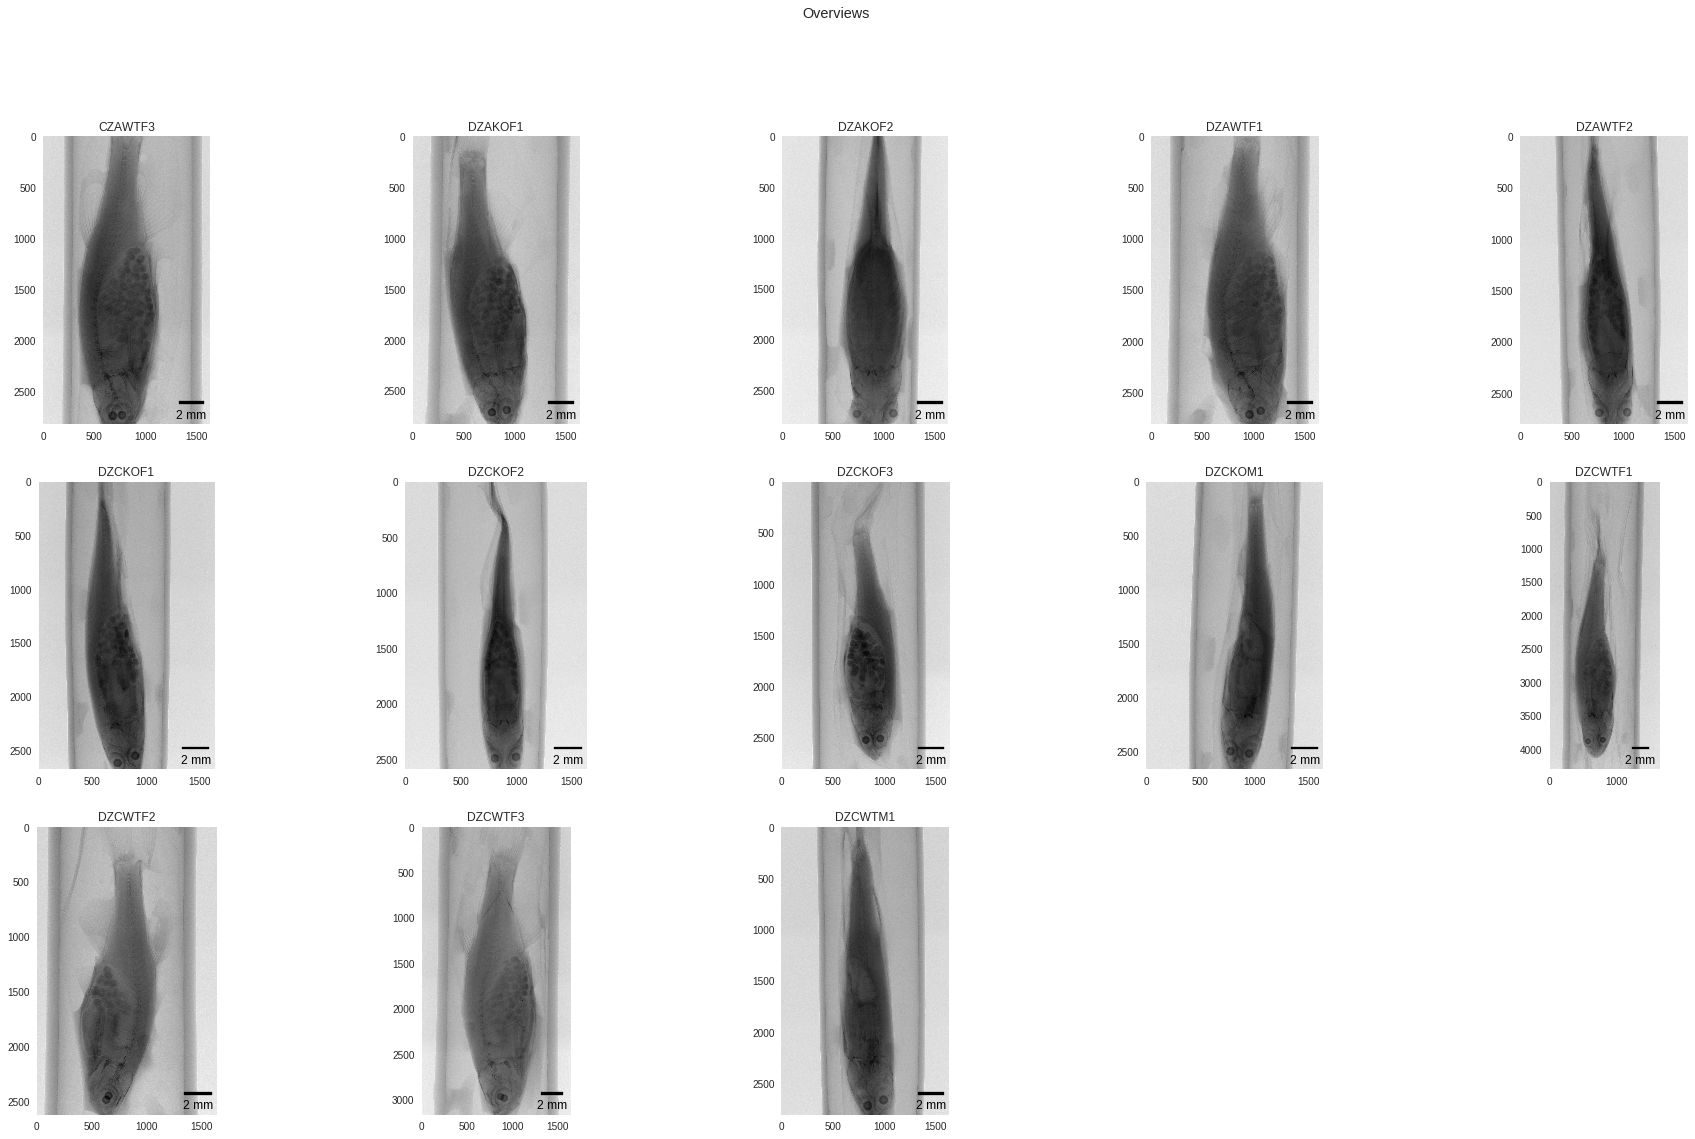

In [12]:
# Diplay overviews (shadow projections)
for c, o in enumerate(Overviews):
    plt.subplot(lines, numpy.ceil(len(Overviews) / float(lines)), c + 1)
    plt.imshow(o)
    plt.gca().add_artist(ScaleBar(PixelSize[c], 'um', color = 'black'))   
    plt.title('%s' % SampleNames[c])
plt.suptitle('Overviews')
plt.savefig(os.path.join(OutPutDir, 'Shadowprojections.png'), bbox_inches='tight')
plt.show()

In [13]:
# Get Middle slice and load it
MiddleSliceName = [r[len(r)//2] for r in ReconstructionNames]
MiddleSlice = [scipy.misc.imread(m, flatten=True) for m in MiddleSliceName]

/home/habi/P/Dev/matplotlib-scalebar/matplotlib_scalebar/scalebar.py:449: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if is_string_like(loc):
/home/habi/P/Dev/matplotlib-scalebar/matplotlib_scalebar/scalebar.py:290: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if is_string_like(location):


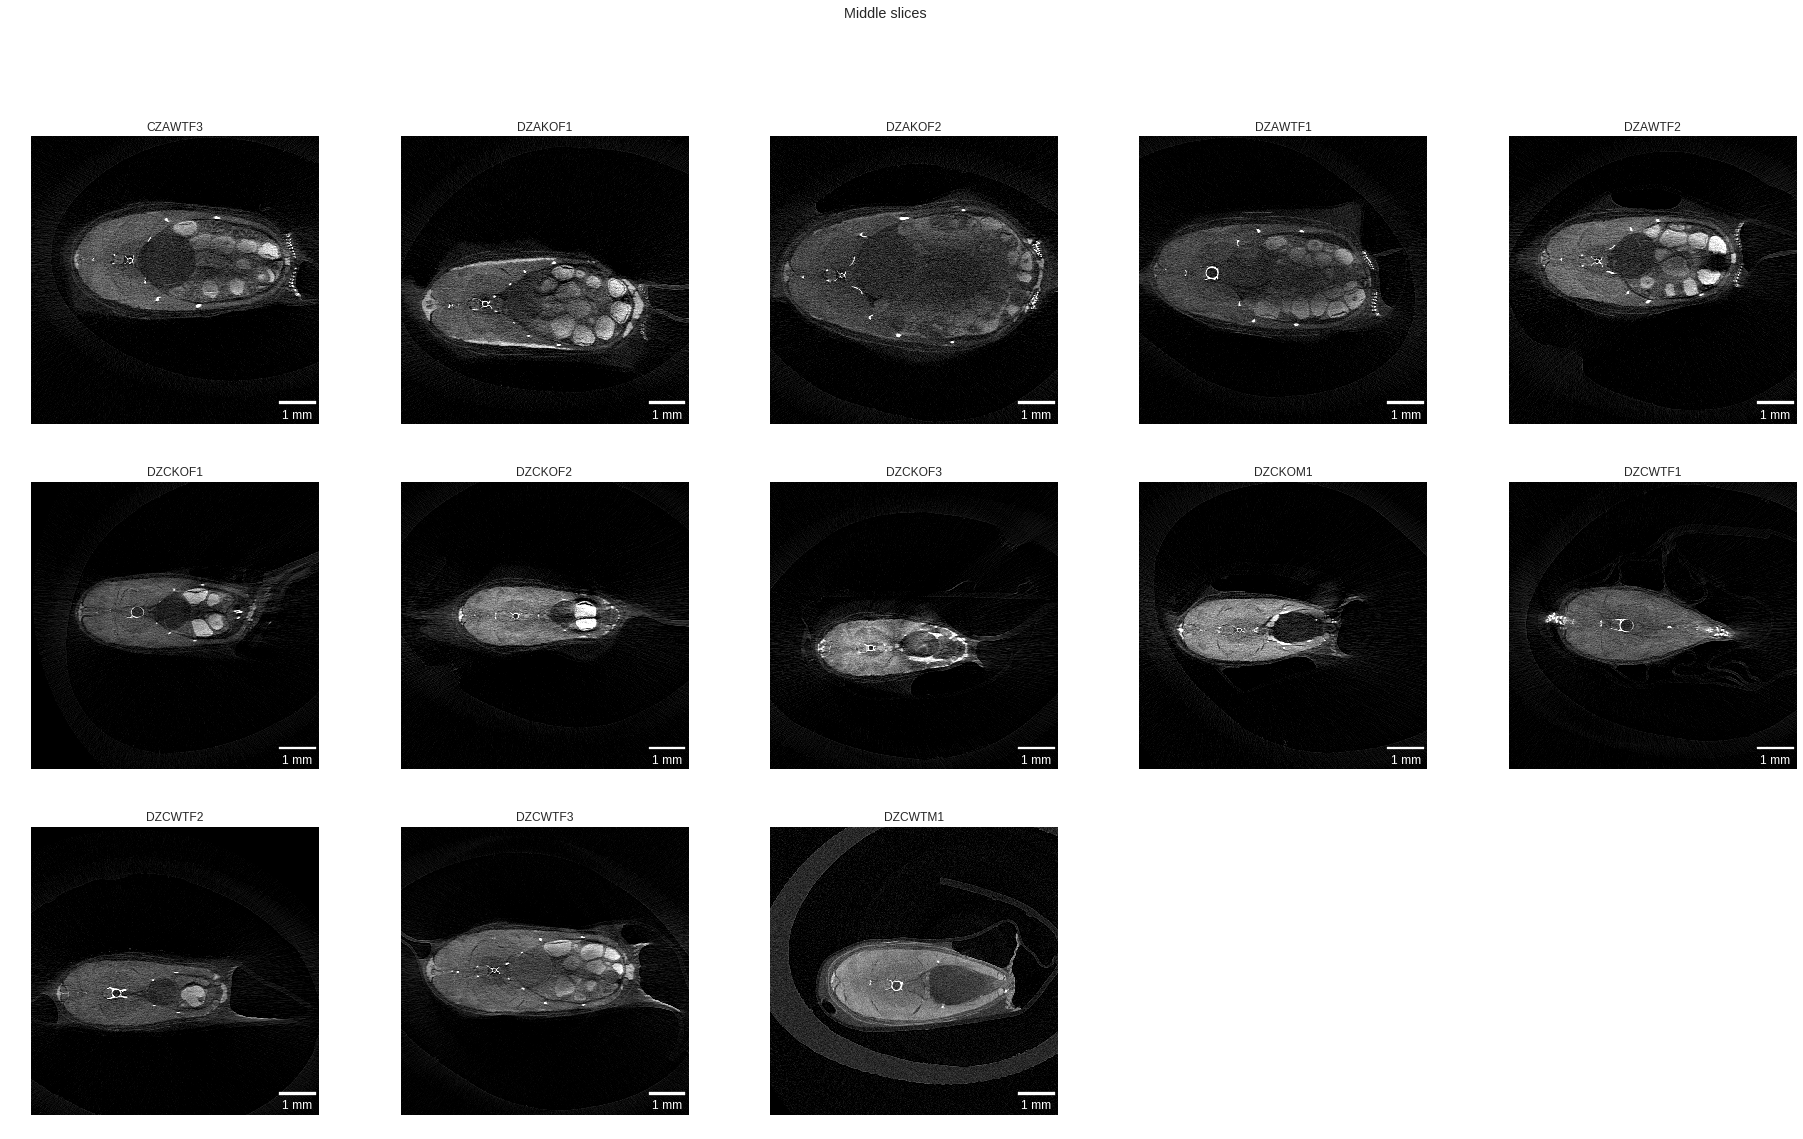

In [14]:
# Display middle slice
for c, m in enumerate(MiddleSlice):
    plt.subplot(lines, numpy.ceil(len(MiddleSlice) / float(lines)), c + 1)
    plt.imshow(m, vmax=0.618 * numpy.max(m))
    plt.title('%s' % SampleNames[c])
    plt.gca().add_artist(ScaleBar(PixelSize[c], 'um'))
    plt.axis('off')
plt.suptitle('Middle slices')
plt.savefig(os.path.join(OutPutDir, 'MiddleSlices.png'), bbox_inches='tight')
plt.show()

In [15]:
# Select a region around the middle
howmuch = 10
MiddleRegionNames = [r[len(r)//2-howmuch//2:len(r)//2+howmuch//2] for r in ReconstructionNames]

In [16]:
# Read the images from the middle region or load the numpy file from disk
FileName = [os.path.join(os.path.dirname(rf), 'middleregion_%04dslices.npy' % howmuch) for rf in RecFolders]
MiddleRegion = [None] * len(SampleNames)
for c, fn in enumerate(FileName):
    if os.path.exists(fn):
        print('%s/%s: Loading %s into memory' % (c+1, len(FileName), fn[len(RootFolder)+1:]))
        MiddleRegion[c] = numpy.load(fn, mmap_mode='r')
    else:
        print('%s/%s: Loading %s images from %s' % (c+1, len(FileName), howmuch, RecFolders[c]))
        MiddleRegion[c] = [scipy.misc.imread(img, flatten=True) for img in MiddleRegionNames[c]]
        numpy.save(fn, MiddleRegion[c], allow_pickle=False)

1/13: Loading 10 images from /media/habi/Fast_SSD/FatContent/CZAWTF3/rec
2/13: Loading 10 images from /media/habi/Fast_SSD/FatContent/DZAKOF1/rec
3/13: Loading 10 images from /media/habi/Fast_SSD/FatContent/DZAKOF2/rec
4/13: Loading 10 images from /media/habi/Fast_SSD/FatContent/DZAWTF1/rec
5/13: Loading 10 images from /media/habi/Fast_SSD/FatContent/DZAWTF2/rec
6/13: Loading 10 images from /media/habi/Fast_SSD/FatContent/DZCKOF1/rec
7/13: Loading 10 images from /media/habi/Fast_SSD/FatContent/DZCKOF2/rec
8/13: Loading 10 images from /media/habi/Fast_SSD/FatContent/DZCKOF3/rec
9/13: Loading 10 images from /media/habi/Fast_SSD/FatContent/DZCKOM1/rec
10/13: Loading 10 images from /media/habi/Fast_SSD/FatContent/DZCWTF1/rec
11/13: Loading 10 images from /media/habi/Fast_SSD/FatContent/DZCWTF2/rec
12/13: Loading 10 images from /media/habi/Fast_SSD/FatContent/DZCWTF3/rec
13/13: Loading 10 images from /media/habi/Fast_SSD/FatContent/DZCWTM1/rec


In [17]:
# Read or genereate the MIP of the middle region
FileName = [os.path.join(os.path.dirname(rf), 'middleregion_mip_from%04dslices.npy' % howmuch) for rf in RecFolders]
MiddleMIPs = [None] * len(SampleNames)
for c, fn in enumerate(FileName):
    if os.path.exists(fn):
        print('%s/%s: Loading %s into memory' % (c+1, len(FileName), fn[len(RootFolder)+1:]))
        MiddleMIPs[c] = numpy.load(fn, mmap_mode='r')
    else:
        print('%s/%s: Generating MIP from %s images' % (c+1, len(FileName), howmuch))
        MiddleMIPs[c] = numpy.max(MiddleRegion[c], axis=0)
        numpy.save(fn, MiddleMIPs[c], allow_pickle=False)
        scipy.misc.imsave(os.path.splitext(fn)[0] + '.png', MiddleMIPs[c])

1/13: Generating MIP from 10 images
2/13: Generating MIP from 10 images
3/13: Generating MIP from 10 images
4/13: Generating MIP from 10 images
5/13: Generating MIP from 10 images
6/13: Generating MIP from 10 images
7/13: Generating MIP from 10 images
8/13: Generating MIP from 10 images
9/13: Generating MIP from 10 images
10/13: Generating MIP from 10 images
11/13: Generating MIP from 10 images
12/13: Generating MIP from 10 images
13/13: Generating MIP from 10 images


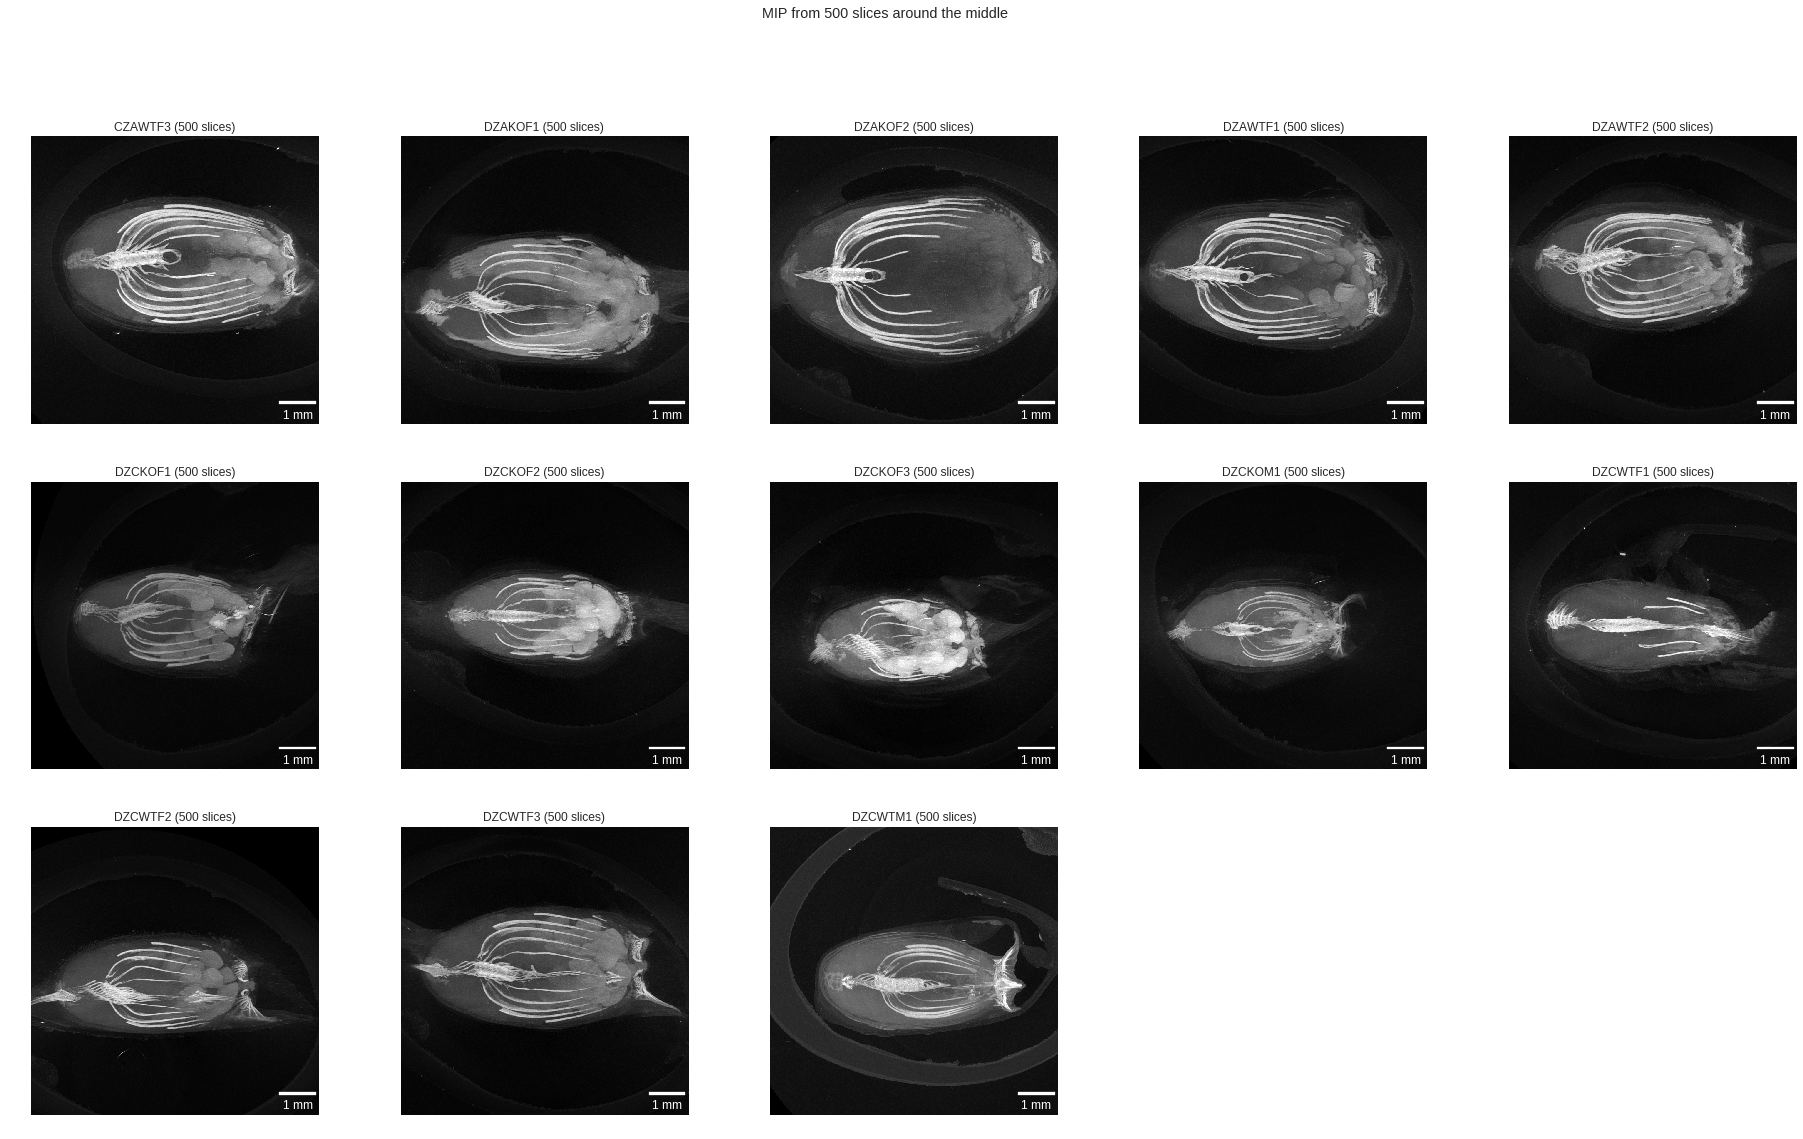

In [18]:
# Display 'around-the-middle' MIPs
for c, m in enumerate(MiddleMIPs):
    plt.subplot(lines, numpy.ceil(len(SampleNames) / float(lines)), c + 1)
    plt.imshow(m)
    plt.gca().add_artist(ScaleBar(PixelSize[c], 'um'))
    plt.title('%s (%s slices)' % (SampleNames[c], howmuch))
    plt.axis('off')
    plt.tight_layout
plt.suptitle('MIP from %s slices around the middle' % howmuch)
plt.savefig(os.path.join(OutPutDir, 'Middle_MIPs_from%04dslices.png' % howmuch), bbox_inches='tight')
plt.show()

In [19]:
# Load a random file to get the image size
ImageShape = [numpy.shape(scipy.misc.imread(n[numpy.random.randint(len(n))],
                                            flatten = True)) for n in ReconstructionNames]

In [20]:
# Do we have the same ROI for all scans?
if len(numpy.unique(ImageShape)) > 1:
    print('We have different ROI sizes!')
    print(numpy.unique(ImageShape))
else:
    print('All ROIs are equally sized and square')

All ROIs are equally sized and square


In [42]:
# Use a manageable amount of equally spaced slices images
HowManySlices = 3000
StepWidth = [int(round(len(r) / HowManySlices)) for r in ReconstructionNames]
Usethis = [rn[::sw] for rn, sw in zip(ReconstructionNames, StepWidth)]
for c, i in enumerate(SampleNames):
    print('For sample %s we are working with a subset of %s (%0.1f %% of totally %s) equally '
          'spaced slices' % (i, len(Usethis[c]), len(Usethis[c]) / len(ReconstructionNames[c]) * 100, 
                             len(ReconstructionNames[c])))

For sample CZAWTF3 we are working with a subset of 2709 (100.0 % of totally 2709) equally spaced slices
For sample DZAKOF1 we are working with a subset of 2713 (100.0 % of totally 2713) equally spaced slices
For sample DZAKOF2 we are working with a subset of 2717 (100.0 % of totally 2717) equally spaced slices
For sample DZAWTF1 we are working with a subset of 2699 (100.0 % of totally 2699) equally spaced slices
For sample DZAWTF2 we are working with a subset of 2689 (100.0 % of totally 2689) equally spaced slices
For sample DZCKOF1 we are working with a subset of 2567 (100.0 % of totally 2567) equally spaced slices
For sample DZCKOF2 we are working with a subset of 2481 (100.0 % of totally 2481) equally spaced slices
For sample DZCKOF3 we are working with a subset of 2695 (100.0 % of totally 2695) equally spaced slices
For sample DZCKOM1 we are working with a subset of 2549 (100.0 % of totally 2549) equally spaced slices
For sample DZCWTF1 we are working with a subset of 4072 (100.0 %

In [43]:
# Read the images or load the numpy file from disk
FileName = [os.path.join(os.path.dirname(rf), 'rec_from%04dslices.npy' % len(fn)) for rf, fn in zip(RecFolders, Usethis)]
Reconstructions = [None] * len(Usethis)
for c, fn in enumerate(FileName):
    if os.path.exists(fn):
        print('%s/%s: Loading %s into memory' % (c+1, len(FileName), fn))
        Reconstructions[c] = numpy.load(fn, mmap_mode='r')
    else:
        print('%s/%s: Loading %s images from %s' % (c+1, len(FileName), len(Usethis[c]), RecFolders[c]))
        Reconstructions[c] = [scipy.misc.imread(img, flatten=True) for img in Usethis[c]]
        numpy.save(fn, Reconstructions[c], allow_pickle=False)

1/13: Loading 2709 images from /media/habi/Fast_SSD/FatContent/CZAWTF3/rec
2/13: Loading 2713 images from /media/habi/Fast_SSD/FatContent/DZAKOF1/rec
3/13: Loading 2717 images from /media/habi/Fast_SSD/FatContent/DZAKOF2/rec
4/13: Loading 2699 images from /media/habi/Fast_SSD/FatContent/DZAWTF1/rec
5/13: Loading 2689 images from /media/habi/Fast_SSD/FatContent/DZAWTF2/rec
6/13: Loading 2567 images from /media/habi/Fast_SSD/FatContent/DZCKOF1/rec
7/13: Loading 2481 images from /media/habi/Fast_SSD/FatContent/DZCKOF2/rec
8/13: Loading 2695 images from /media/habi/Fast_SSD/FatContent/DZCKOF3/rec
9/13: Loading 2549 images from /media/habi/Fast_SSD/FatContent/DZCKOM1/rec
10/13: Loading 4072 images from /media/habi/Fast_SSD/FatContent/DZCWTF1/rec
11/13: Loading 2507 images from /media/habi/Fast_SSD/FatContent/DZCWTF2/rec
12/13: Loading 3052 images from /media/habi/Fast_SSD/FatContent/DZCWTF3/rec
13/13: Loading 2691 images from /media/habi/Fast_SSD/FatContent/DZCWTM1/rec


In [24]:
# Display sampler of slices
# But only if we have less than 11 HowManySlices
ShowHistograms = False
if HowManySlices < 11:
    for c, m in enumerate(SampleNames):
        for d, n in enumerate(Usethis[c]):
            if ShowHistograms:
                plt.subplot(2, len(Usethis[c]), d + 1)
            else:
                plt.subplot(1, len(Usethis[c]), d + 1)
            plt.imshow(numpy.ma.masked_less(Reconstructions[c][d],25))
            plt.gca().add_artist(ScaleBar(PixelSize[c], 'um', color='black'))
            if d:
                plt.title('Reconstruction %s' % os.path.splitext(os.path.basename(Usethis[c][d]))[0][-4:])
            else:
                plt.title('Sample %s, Rec %s' % (SampleNames[c], os.path.splitext(os.path.basename(Usethis[c][d]))[0][-4:]))
            if ShowHistograms:
                plt.subplot(2, len(Usethis[c]), d + 1 + len(Usethis[c]))
                plt.hist(Reconstructions[c][d][Reconstructions[c][d]>1].ravel(), log=True)
            plt.tight_layout
        plt.savefig(os.path.join(OutPutDir, 'Sampler_%simgs_%s.png' % (len(Usethis[c]), SampleNames[c])), bbox_inches='tight')
        plt.show()
else:
    print('Displaying a sampler with ~%s slices does not make sense...' % HowManySlices)

Displaying a sampler with ~25 slices does not make sense...


In [25]:
# Read or genereate the MIP
FileName = [os.path.join(os.path.dirname(rf), 'mip_from%04dslices.npy' % len(fn)) for rf, fn in zip(RecFolders, Usethis)]
MIPs = [None] * len(Usethis)
for c, fn in enumerate(FileName):
    if os.path.exists(fn):
        print('%s/%s: Loading %s into memory' % (c+1, len(FileName), fn))
        MIPs[c] = numpy.load(fn, mmap_mode='r')
    else:
        print('%s/%s: Generating MIP from %s images' % (c+1, len(FileName), len(Usethis[c])))
        MIPs[c] = numpy.max(Reconstructions[c], axis=0)
        numpy.save(fn, MIPs[c], allow_pickle=False)
        scipy.misc.imsave(os.path.splitext(fn)[0] + '.png', MIPs[c])        

1/13: Generating MIP from 26 images
2/13: Generating MIP from 25 images
3/13: Generating MIP from 25 images
4/13: Generating MIP from 25 images
5/13: Generating MIP from 25 images
6/13: Generating MIP from 25 images
7/13: Generating MIP from 26 images
8/13: Generating MIP from 25 images
9/13: Generating MIP from 25 images
10/13: Generating MIP from 25 images
11/13: Generating MIP from 26 images
12/13: Generating MIP from 26 images
13/13: Generating MIP from 25 images


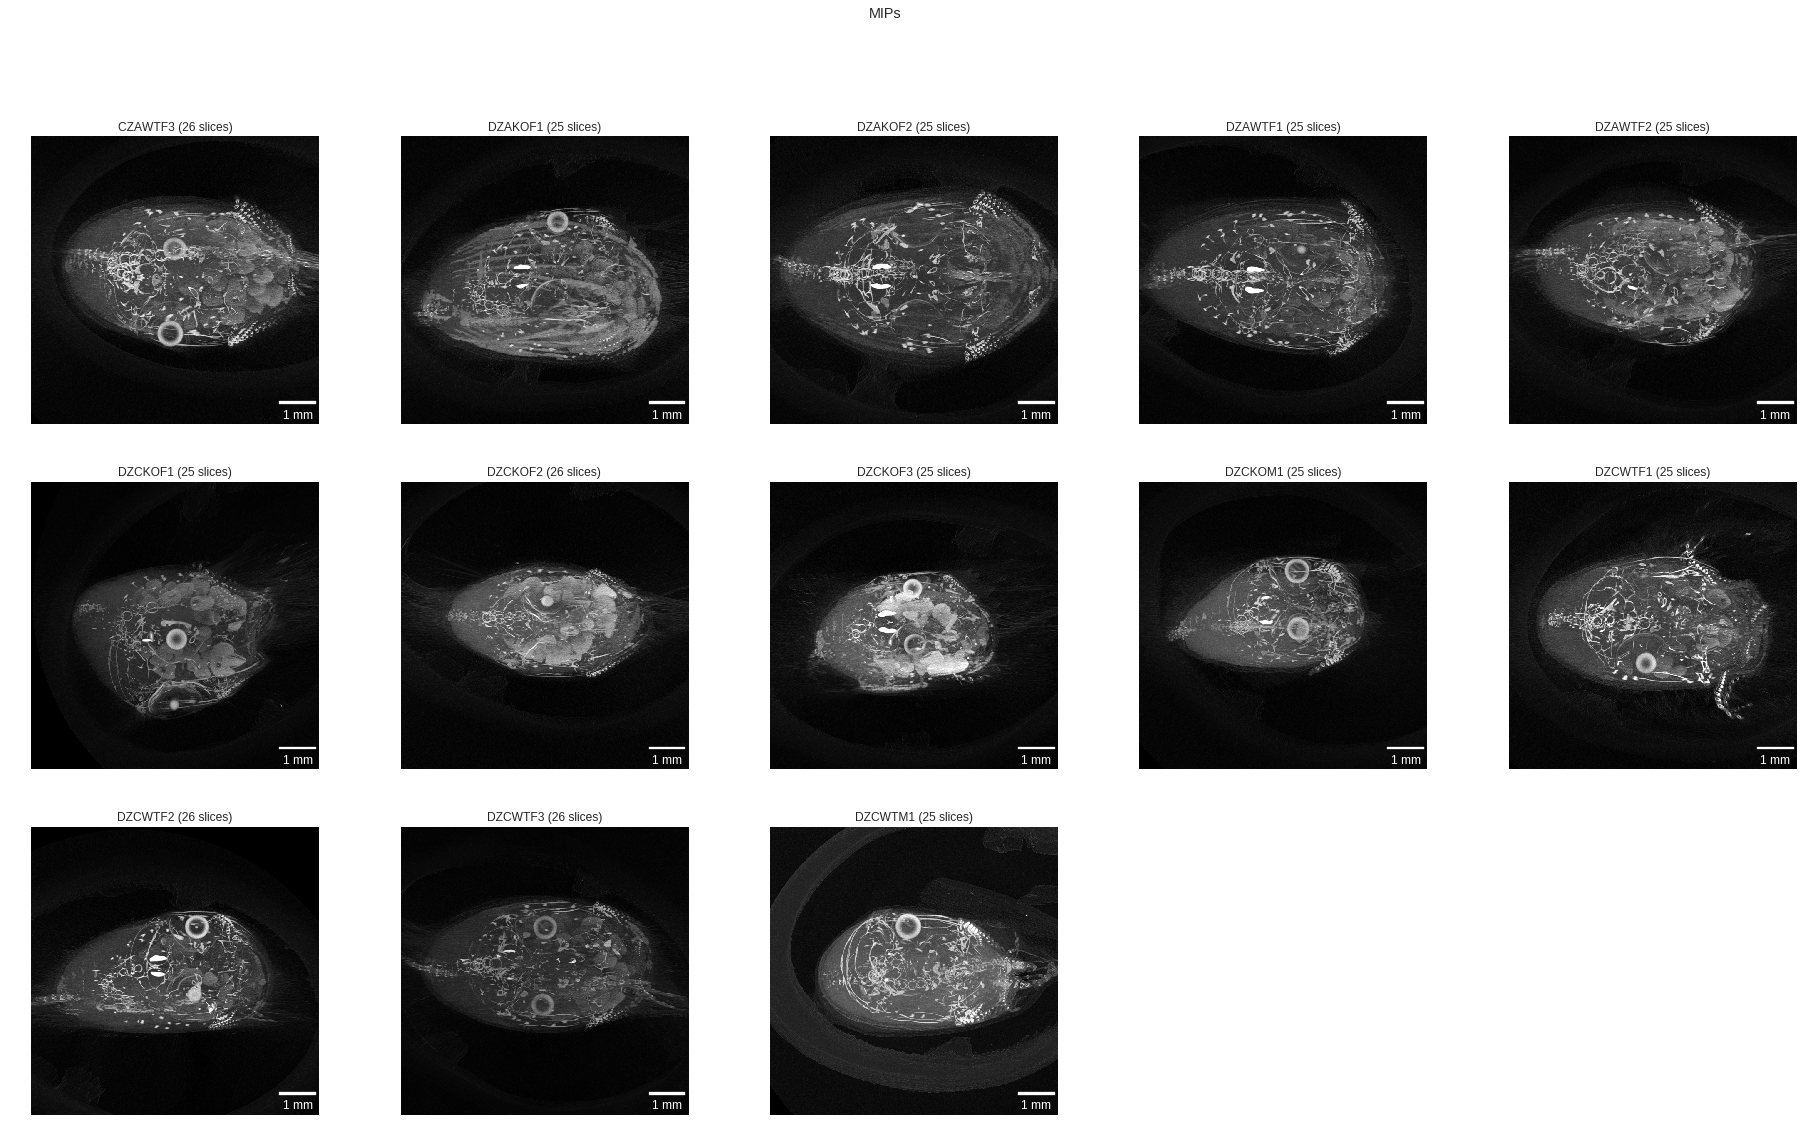

In [26]:
# Display 'through-the-sample' MIPs
for c, m in enumerate(MIPs):
    plt.subplot(lines, numpy.ceil(len(SampleNames) / float(lines)), c + 1)
    plt.imshow(m)
    plt.gca().add_artist(ScaleBar(PixelSize[c], 'um'))
    plt.title('%s (%s slices)' % (SampleNames[c],
                                      len(Usethis[c])))
    plt.axis('off')
plt.suptitle('MIPs')
plt.savefig(os.path.join(OutPutDir, 'MIPs_from%04dslices.png' % HowManySlices), bbox_inches='tight')
plt.show()

In [27]:
Otsu_MIP = [skimage.filters.threshold_otsu(m) for m in MIPs]

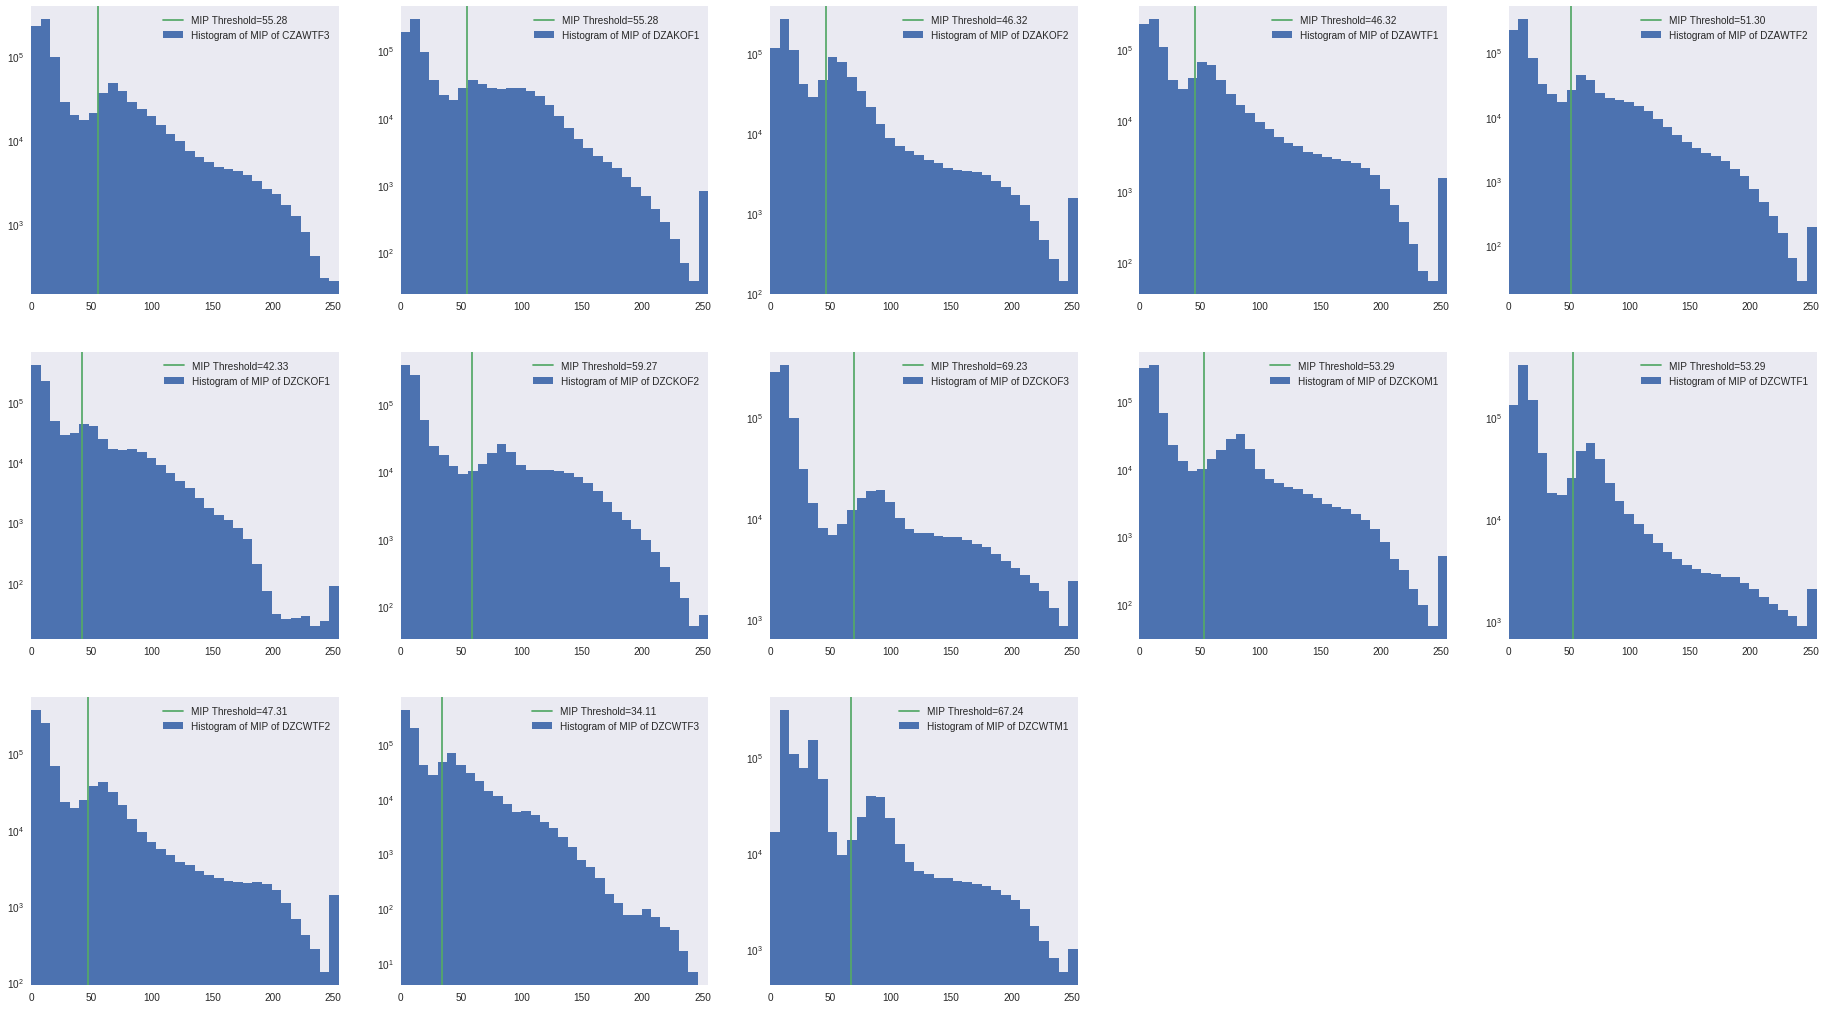

In [28]:
# Display MIP Histograms
for c, m in enumerate(MIPs):
    plt.subplot(lines, numpy.ceil(len(SampleNames) / float(lines)), c + 1)
    plt.hist(m.ravel(), log=True, bins=32, label='Histogram of MIP of %s' % SampleNames[c])
    plt.axvline(Otsu_MIP[c], c=seaborn.color_palette()[1], label='MIP Threshold=%0.2f' % Otsu_MIP[c])
    plt.xlim([0,255])
    plt.legend()
plt.savefig(os.path.join(OutPutDir, 'MIP_Histograms_from%04dslices.png' % HowManySlices), bbox_inches='tight')
plt.show()

In [29]:
CalculateAllThresholds = False

In [30]:
if CalculateAllThresholds:
    # This will take a long time, since we calculate the threshold for *every* image!
    Otsu = [[skimage.filters.threshold_otsu(image) for image in sample] for sample in Reconstructions]

In [31]:
if CalculateAllThresholds:
    # grab the thresholds in the 60-80% range of the respective values
    split = 5
    Selected = [sorted(t)[(split-2)*len(t)//split:(split-1)*len(t)//split] for t in Otsu]
    # mask the values of the threshold that are *not* in this range
    Otsu_selected = [numpy.ma.masked_outside(o, numpy.min(sel), numpy.max(sel)) for o, sel in zip(Otsu, Selected)]
    # use the mean of this 60-80% value to threshold the datasets
    GlobalThreshold = [numpy.mean(os) for os in Otsu_selected]

In [32]:
# FORCE THRESHOLD
# GlobalThreshold = [20 for t in GlobalThreshold]

In [33]:
# Grab the maximal amount of images, for scaling the plots
MaxImages = 0
for i in Usethis:
    MaxImages = max(MaxImages, len(i))

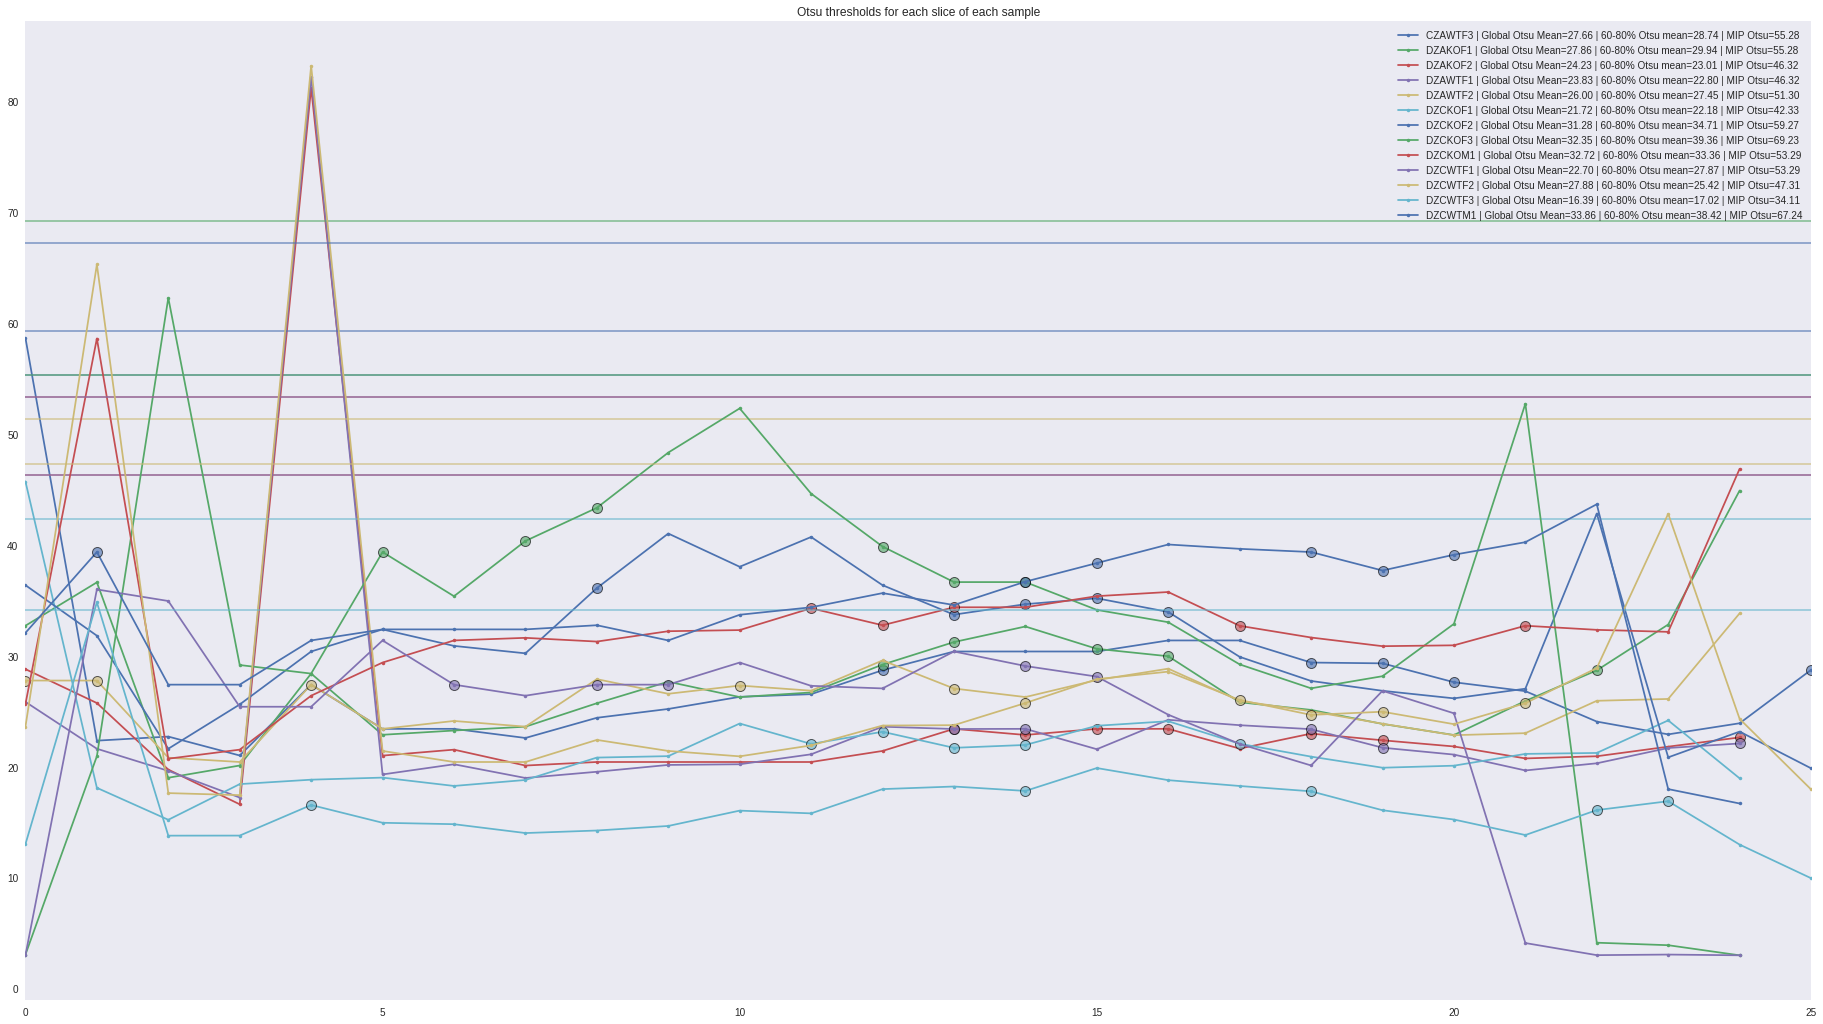

In [34]:
if CalculateAllThresholds:
    for c, s in enumerate(SampleNames):
        plt.plot(Otsu[c], marker='.', label='%s | Global Otsu Mean=%.2f | 60-80%% Otsu mean=%0.2f '
                 '| MIP Otsu=%0.2f' % (s,
                                       numpy.mean(Otsu[c]),
                                       GlobalThreshold[c],
                                       Otsu_MIP[c]),
                 c=seaborn.color_palette(n_colors=len(SampleNames))[c])
        plt.plot(Otsu_selected[c], '.', ms=20, alpha=0.618, markeredgecolor='k', markeredgewidth=1, 
                 c=seaborn.color_palette(n_colors=len(SampleNames))[c])
        plt.axhline(Otsu_MIP[c], alpha=0.618, c=seaborn.color_palette(n_colors=len(SampleNames))[c])
        plt.legend(loc='best')
    plt.xlim([0, MaxImages - 1])
    plt.title('Otsu thresholds for each slice of each sample')
    plt.savefig(os.path.join(OutPutDir, 'Thresholds.png'), bbox_inches='tight')
    plt.show()

In [35]:
if CalculateAllThresholds:
    GlobalOtsu = [skimage.filters.threshold_otsu(numpy.array(r)) for r in Reconstructions]

In [36]:
if CalculateAllThresholds:
    # Compare global Otsu threshold, 60%-80% selected threshold and threshold from MIPs
    for c,s in enumerate(SampleNames):
        print('For %s we have a' % s)
        print('\t- 60-80%% selected threshold of %0.2f' % GlobalThreshold[c])
        print('\t- global Otsu threshold of %0.2f' % GlobalOtsu[c])
        print('\t- Otsu threshold calculated from the MIP of %0.2f' % Otsu_MIP[c])

For CZAWTF3 we have a
	- 60-80% selected threshold of 28.74
	- global Otsu threshold of 26.40
	- Otsu threshold calculated from the MIP of 55.28
For DZAKOF1 we have a
	- 60-80% selected threshold of 29.94
	- global Otsu threshold of 26.40
	- Otsu threshold calculated from the MIP of 55.28
For DZAKOF2 we have a
	- 60-80% selected threshold of 23.01
	- global Otsu threshold of 21.42
	- Otsu threshold calculated from the MIP of 46.32
For DZAWTF1 we have a
	- 60-80% selected threshold of 22.80
	- global Otsu threshold of 21.42
	- Otsu threshold calculated from the MIP of 46.32
For DZAWTF2 we have a
	- 60-80% selected threshold of 27.45
	- global Otsu threshold of 25.40
	- Otsu threshold calculated from the MIP of 51.30
For DZCKOF1 we have a
	- 60-80% selected threshold of 22.18
	- global Otsu threshold of 20.42
	- Otsu threshold calculated from the MIP of 42.33
For DZCKOF2 we have a
	- 60-80% selected threshold of 34.71
	- global Otsu threshold of 32.37
	- Otsu threshold calculated from th

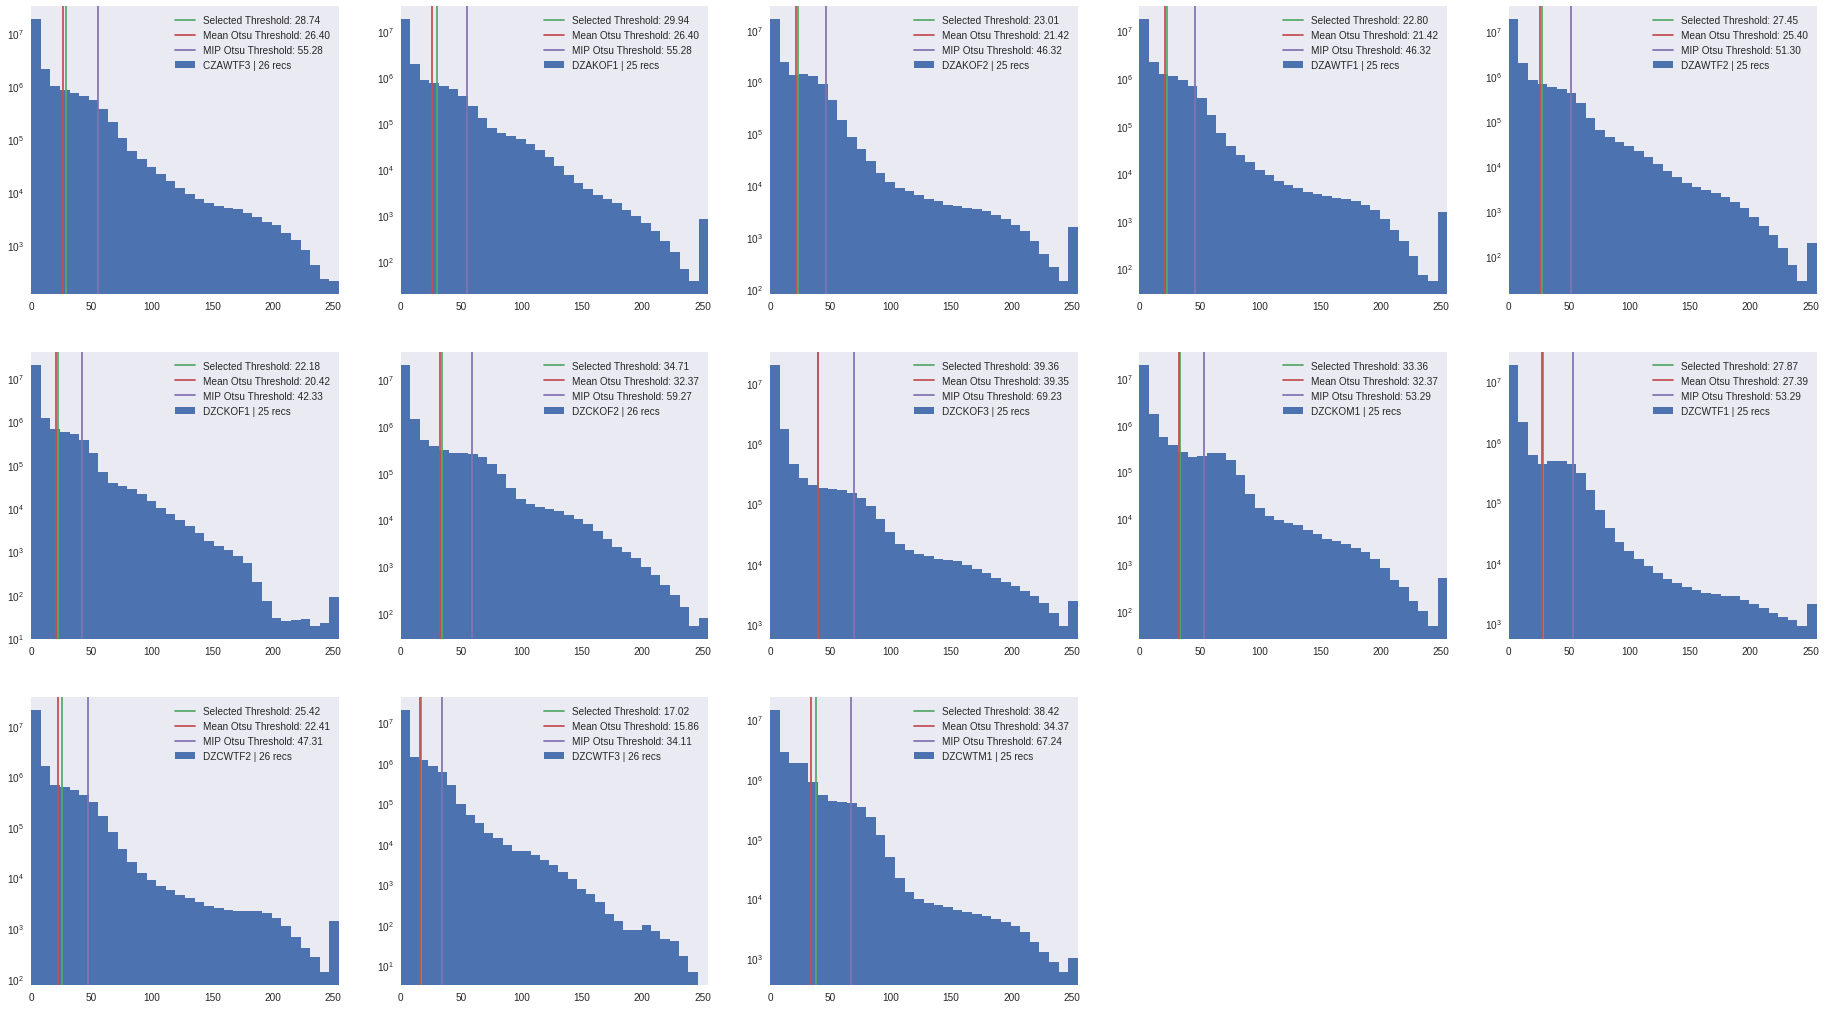

In [37]:
# Show all (global) histograms
for c, s in enumerate(SampleNames):
    plt.subplot(lines, numpy.ceil(len(SampleNames) / float(lines)), c + 1)
    plt.hist(numpy.array(Reconstructions[c]).ravel(), bins=32, log=True,
             label='%s | %s recs' % (s, len(Reconstructions[c])))
    if CalculateAllThresholds:
        plt.axvline(GlobalThreshold[c],
                    label='Selected Threshold: %0.2f' % GlobalThreshold[c],
                    c=seaborn.color_palette()[1])
        plt.axvline(GlobalOtsu[c], label='Mean Otsu Threshold: %0.2f' % GlobalOtsu[c],
                    c=seaborn.color_palette()[2])
    plt.axvline(Otsu_MIP[c], label='MIP Otsu Threshold: %0.2f' % Otsu_MIP[c],
                c=seaborn.color_palette()[3])
    plt.legend()
    plt.xlim([0, 255])
plt.savefig(os.path.join(OutPutDir, 'Histograms_Thresholds_from%04dslices.png' % HowManySlices), bbox_inches='tight')
plt.show()

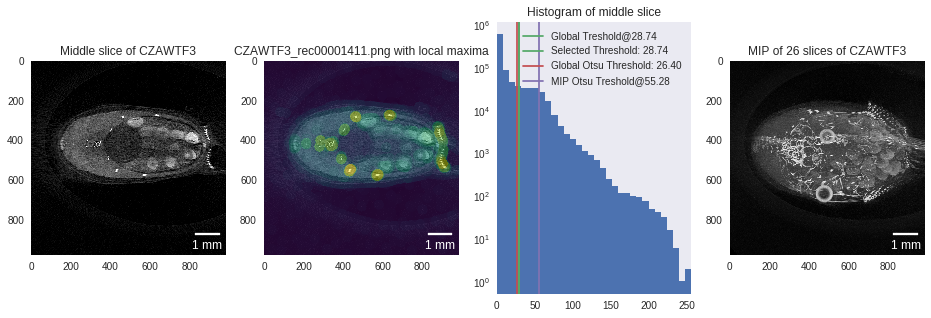

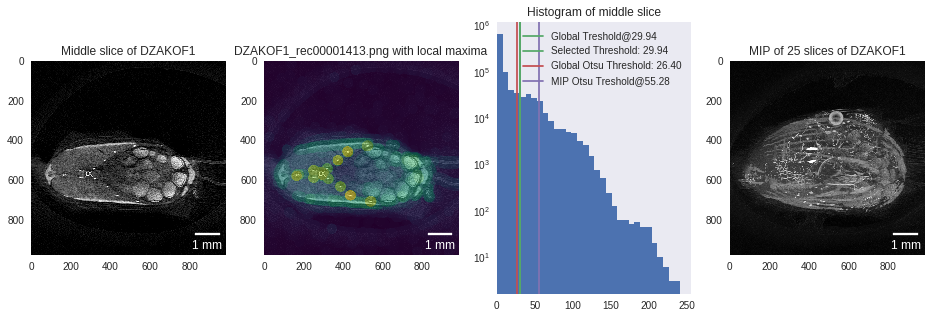

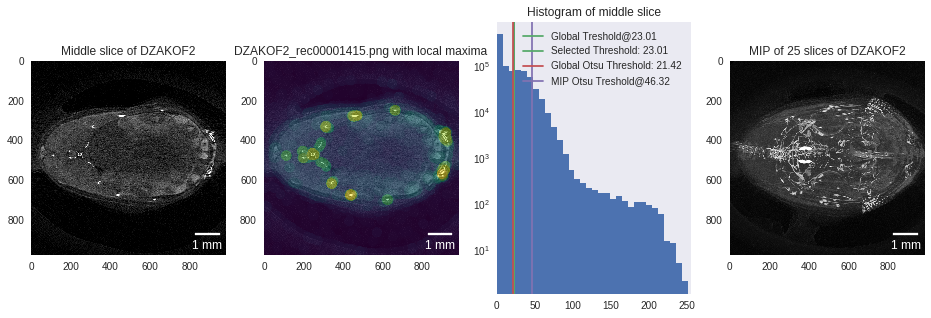

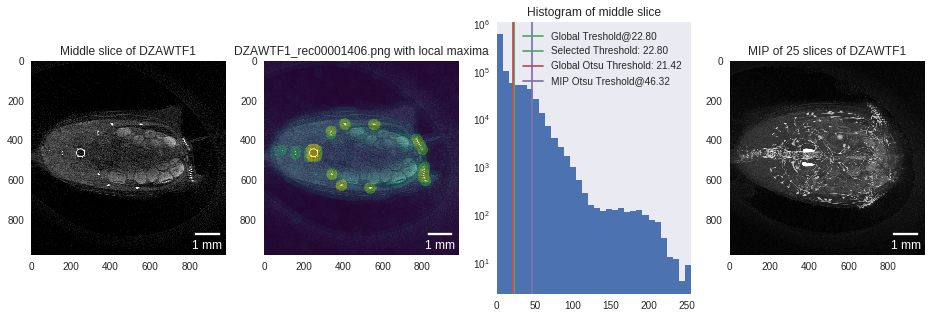

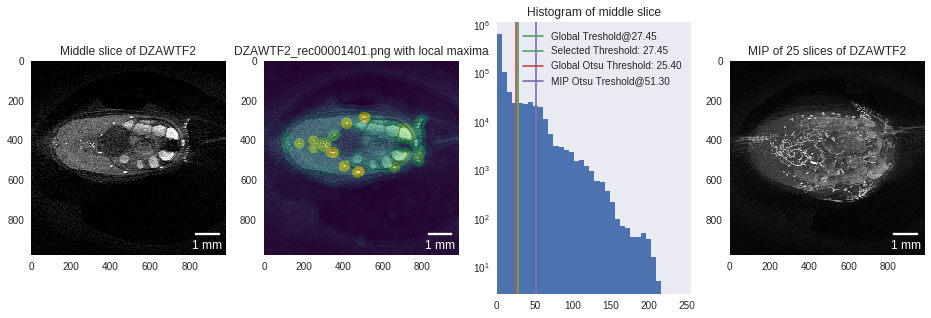

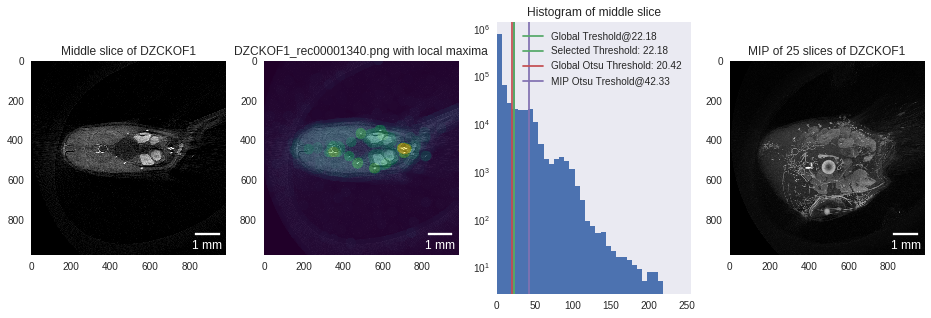

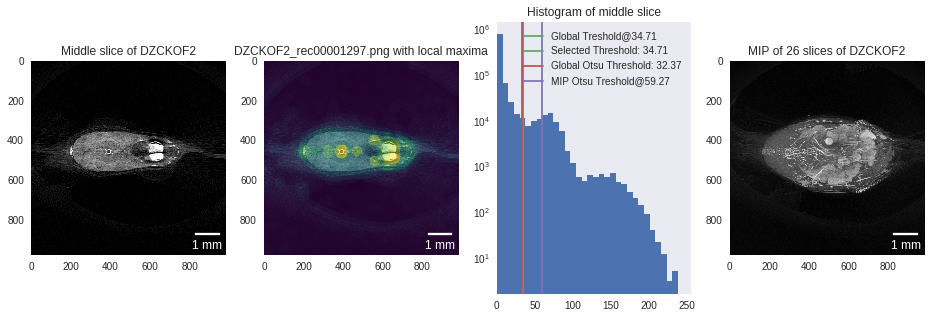

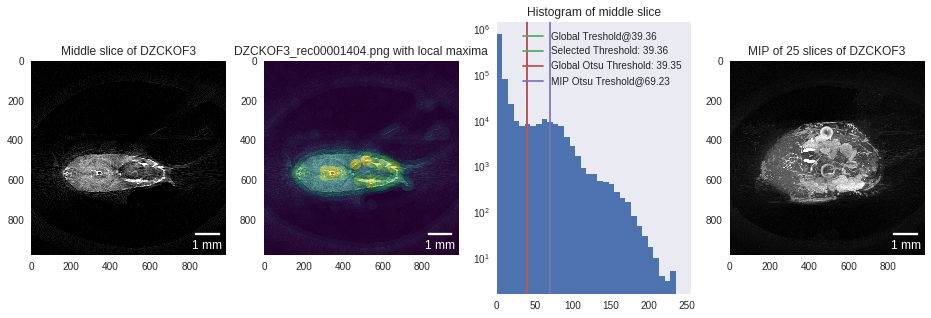

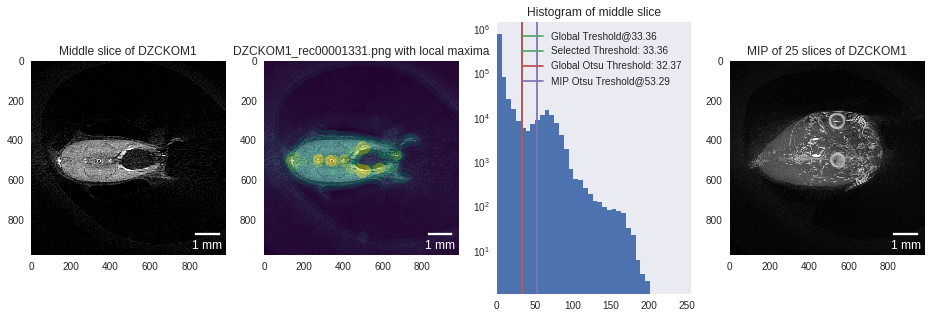

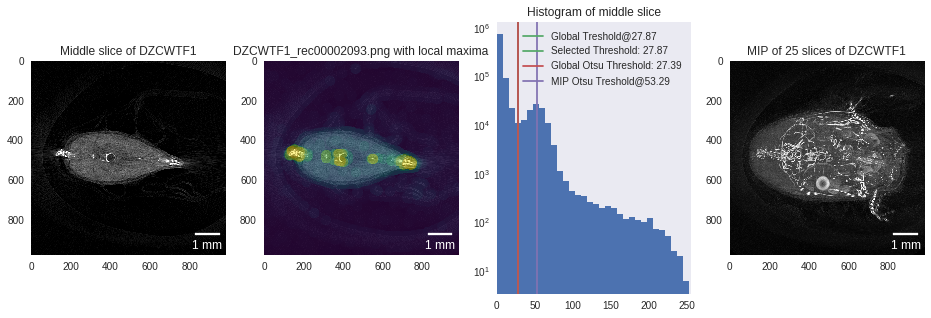

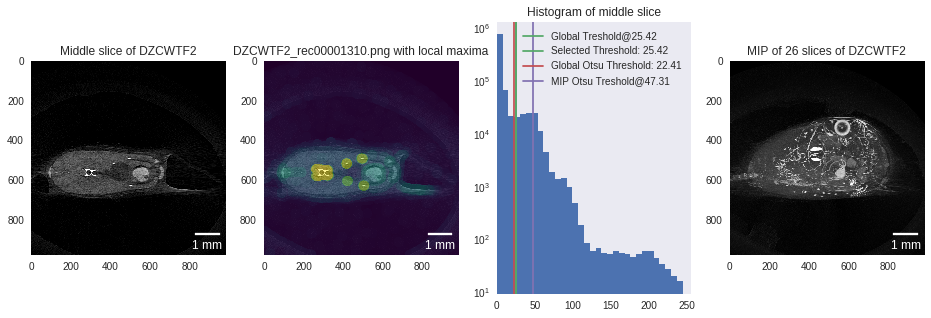

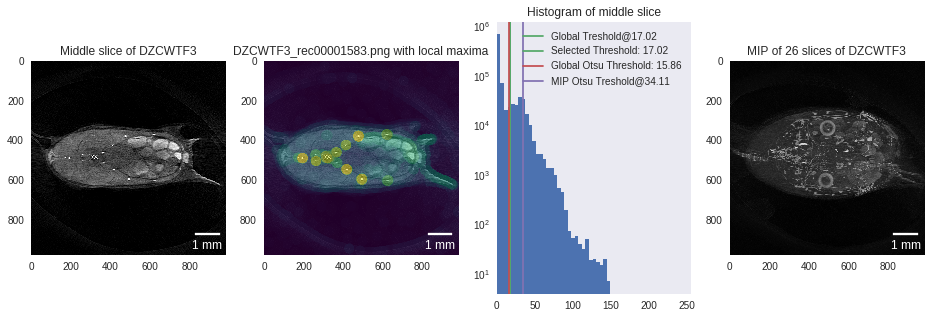

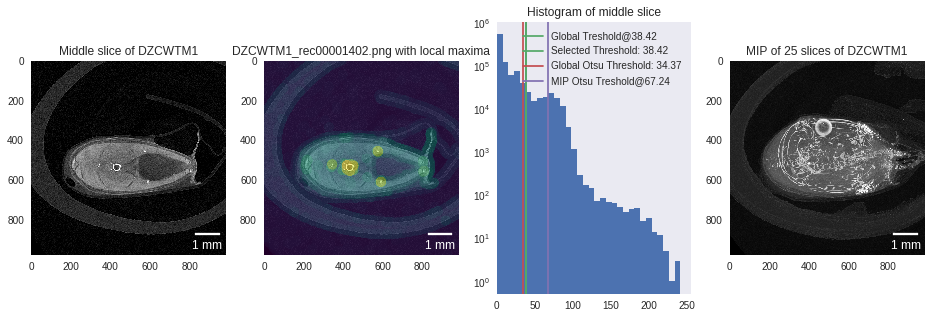

In [38]:
# Show middle images with some data
plt.rcParams['figure.figsize'] = (16, 5)
for c,s in enumerate(SampleNames):
    maximum = skimage.filters.rank.maximum(MiddleSlice[c].astype('uint8'), skimage.morphology.disk(25))
    plt.subplot(141)
    plt.imshow(MiddleSlice[c], vmax=0.618*numpy.max(MiddleSlice[c]))
    plt.gca().add_artist(ScaleBar(PixelSize[c], 'um'))
    plt.title('Middle slice of %s' % s)
    plt.subplot(142)
    plt.imshow(MiddleSlice[c], vmax=0.618*numpy.max(MiddleSlice[c]))
    plt.imshow(maximum, cmap='viridis', alpha=0.5)
    plt.gca().add_artist(ScaleBar(PixelSize[c], 'um'))    
    plt.title('%s with local maxima' % os.path.basename(MiddleSliceName[c]))
    plt.subplot(143)
    plt.hist(MiddleSlice[c].ravel(), bins=32, log=True)
    if CalculateAllThresholds:
        plt.axvline(GlobalThreshold[c], c=seaborn.color_palette()[1], label='Global Treshold@%0.2f' % GlobalThreshold[c])
        plt.axvline(GlobalThreshold[c],
                    label='Selected Threshold: %0.2f' % GlobalThreshold[c],
                    c=seaborn.color_palette()[1])
        plt.axvline(GlobalOtsu[c], label='Global Otsu Threshold: %0.2f' % GlobalOtsu[c],
                    c=seaborn.color_palette()[2])        
    plt.axvline(Otsu_MIP[c], c=seaborn.color_palette()[3], label='MIP Otsu Treshold@%0.2f' % Otsu_MIP[c])        
    plt.legend(loc='best')
    plt.xlim([0,255])
    plt.title('Histogram of middle slice')
    plt.subplot(144)
    plt.imshow(MIPs[c])
    plt.title('MIP of %s slices of %s' % (len(Usethis[c]),
                                          SampleNames[c]))
    plt.gca().add_artist(ScaleBar(PixelSize[c], 'um'))
    plt.show()
plt.rcParams['figure.figsize'] = (16, 9)